In [ ]:
An Overview of the Amazon Sales Report with regards to model comparison


This paper emphasizes the use of modeling techniques suitable for analyzing eCommerce data, which primarily consists of categorical variables. 
Initially, we conducted exploratory data analysis (EDA) on the dataset without transformation. Subsequently, we applied EDA to the dataset after
performing dummy variable transformations. The dataset, sourced from Kaggle, is titled 'Amazon Sales Report' and pertains to online sales from India.
The primary objective of this study is to recommend the most suitable modeling technique for such data. Specifically, we aim to compare
two models: linear regression and logistic regression. In the linear regression model, 'Amount' serves as the dependent variable, 
predicted by variables such as Qty, Fulfilment, ship-postal-code, and category. Conversely, in the logistic regression model, 
the binary dependent variable 'FulfilmentB' is predicted by Qty, Amount, ship-postal-code, and category.


In [ ]:
Data Presentation

 "The data utilized in this study were sourced from Kaggle and are described as follows: the original dataset 'AmazonSales' consists of 12 
 variables and 128,975 observations, data1 and date1 (6 and 37528), (24 variables and 37528), respectively, 
while the dataset data comprises 14 variables and 128975 observations.Using Excel, we removed unnecessary variables from the 'AmazonSales' dataset and created 
a new dataset named 'AmazonSales1'.  Subsequently, we imported these datasets into Python, renaming them as 'data' and 'date1'. Initially, 
'data' was used for exploratory  data analysis (EDA) without any transformations, while 'date1' was reserved for testing our models."



In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [41]:
# Upload the data
data = pd.read_csv('AmazonSales1.csv',low_memory=False)

In [42]:
data.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   FulfilmentB       128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Fulfilment_dum    128975 non-null  int64  
 6   Category          128975 non-null  object 
 7   Size              128975 non-null  object 
 8   Qty               128975 non-null  int64  
 9   currency          121180 non-null  object 
 10  Amount            121180 non-null  float64
 11  ship-city         128942 non-null  object 
 12  ship-postal-code  128942 non-null  float64
 13  ship-country      128942 non-null  object 
 14  fulfilled-by      39277 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 14.8+ MB


In [18]:
data.shape

(128975, 14)

In [6]:
data.isnull().sum()

Date                    0
Status                  0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
dtype: int64

In [44]:
data = data.dropna()
data.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [46]:
data.describe(include='object')

,Date,Status,FulfilmentB,Fulfilment,Category,Size,currency,ship-city,ship-country,fulfilled-by
count,37528,37528,37528,37528,37528,37528,37528,37528,37528,37528
unique,91,11,2,1,8,11,1,4702,1,1
top,4/25/2022,Shipped - Delivered to Buyer,Amazon,Merchant,Set,M,INR,BENGALURU,IN,Easy Ship
freq,697,28754,27627,37528,14058,6897,37528,2850,37528,37528


In [ ]:
Exploratory Data Analysis

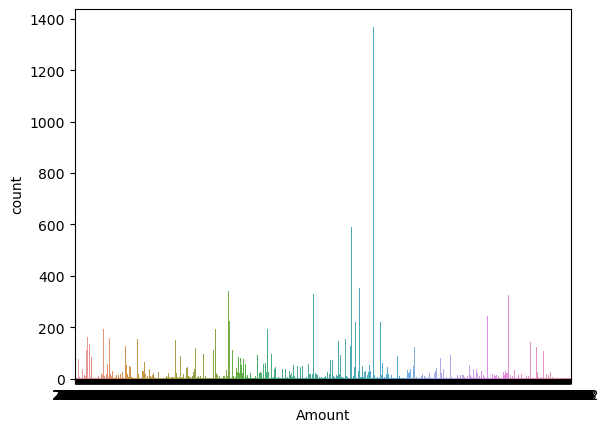

In [28]:
ax=sns.countplot(x='Amount' ,data=data)

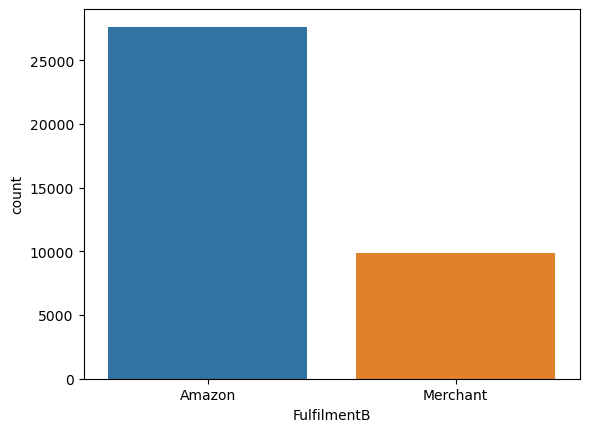

In [45]:
ax=sns.countplot(x='FulfilmentB' , data=data)

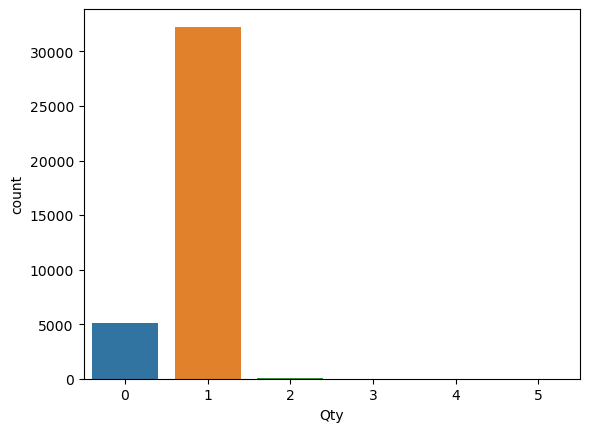

In [47]:
ax=sns.countplot(x='Qty' , data=data)

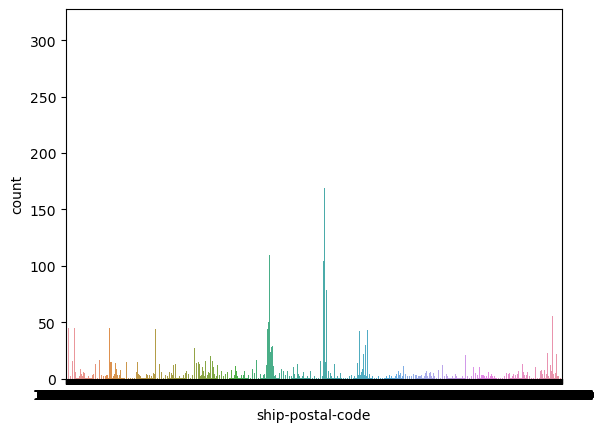

In [48]:
ax=sns.countplot(x='ship-postal-code' , data=data)

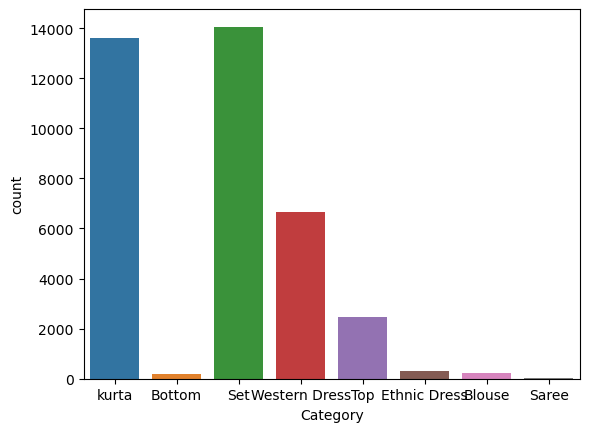

In [49]:
ax=sns.countplot(x='Category' , data=data)

In [50]:
# Create the new data1 set date 1 by uploading the "AmazonSales1" once again to perform data analysis withdummies variables created.
data1 = pd.read_csv('AmazonSales1.csv',low_memory=False)

In [51]:
data1=data1.dropna()
data1.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [85]:
# Since the data come from India, it is obvious that the currency and country will remain the same.
# As a result, Let's dropped variables currency and ship-country as well as Date, Fulfilment, Fulfilment_dum, Size, Fulfilled-by
#data.drop(['currency','ship-city','ship-country','Size','fulfilled-by'], axis=1, inplace=True)
#data.drop(['Fulfilment'], axis=1, inplace=True)
data1.drop([ 'index'], axis=1, inplace=True)

In [86]:
data1.head()

,Status,FulfilmentB,Category,Qty,Amount,ship-postal-code
89698,Shipped - Delivered to Buyer,Amazon,kurta,1,406.0,560085.0
89699,Shipped - Delivered to Buyer,Amazon,kurta,1,299.0,495001.0
89701,Shipped - Delivered to Buyer,Amazon,Bottom,1,377.0,700078.0
89702,Shipped - Delivered to Buyer,Amazon,kurta,1,725.0,600028.0
89703,Shipped - Delivered to Buyer,Amazon,kurta,1,579.0,560055.0


In [87]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37528 entries, 89698 to 128974
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            37528 non-null  object 
 1   FulfilmentB       37528 non-null  object 
 2   Category          37528 non-null  object 
 3   Qty               37528 non-null  int64  
 4   Amount            37528 non-null  float64
 5   ship-postal-code  37528 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [88]:
data1.shape

(37528, 6)

In [89]:
data1.dtypes

Status               object
FulfilmentB          object
Category             object
Qty                   int64
Amount              float64
ship-postal-code    float64
dtype: object

In [90]:
# Let's create the dummies variables
#date1 =pd.get_dummies(date1, dtype=int)
date1 =pd.get_dummies(data1, dtype=int)
date1

,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,...,FulfilmentB_Amazon,FulfilmentB_Merchant,Category_Blouse,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta
89698,1,406.0,560085.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
89699,1,299.0,495001.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
89701,1,377.0,700078.0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
89702,1,725.0,600028.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
89703,1,579.0,560055.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,1,791.0,302004.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
128971,1,459.0,500086.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
128972,1,487.0,500086.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
128973,1,791.0,690507.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [91]:
date1.shape

(37528, 24)

In [92]:
date1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37528 entries, 89698 to 128974
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Qty                                   37528 non-null  int64  
 1   Amount                                37528 non-null  float64
 2   ship-postal-code                      37528 non-null  float64
 3   Status_Cancelled                      37528 non-null  int32  
 4   Status_Pending                        37528 non-null  int32  
 5   Status_Pending - Waiting for Pick Up  37528 non-null  int32  
 6   Status_Shipped - Damaged              37528 non-null  int32  
 7   Status_Shipped - Delivered to Buyer   37528 non-null  int32  
 8   Status_Shipped - Lost in Transit      37528 non-null  int32  
 9   Status_Shipped - Out for Delivery     37528 non-null  int32  
 10  Status_Shipped - Picked Up            37528 non-null  int32  
 11  Status_Shipped 

<Axes: >

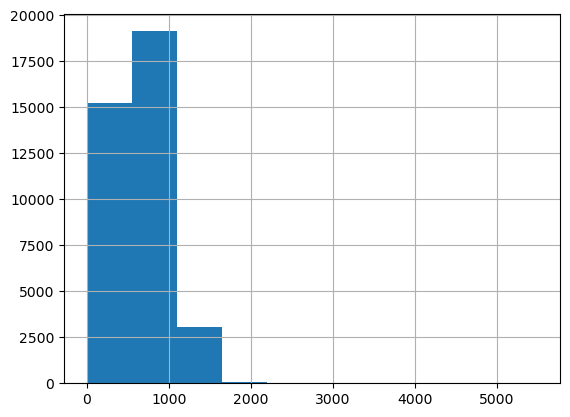

In [62]:
# Data visualization for the dependent variables
# Making a histogram of the Amount variable.
date1['Amount'].hist()

<Axes: xlabel='FulfilmentB_Amazon', ylabel='FulfilmentB_Merchant'>

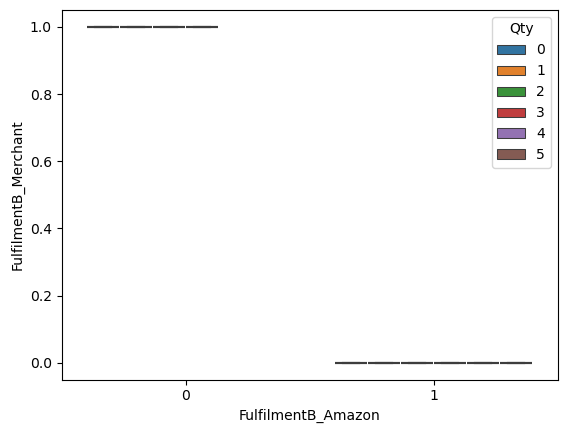

In [69]:
# Making a histogram of the Fulfilment variable variable.
# Create grouped boxplot  
# create grouped boxplot  
#/*sns.boxplot(x = date1['FulfilmentB_Amazon'], 
  #          y = data['Fu;filmentB_Merchant'], 
   #         hue = data['sex']) */ #

sns.boxplot(x = date1['FulfilmentB_Amazon'], 
            y = date1['FulfilmentB_Merchant'], 
             hue = date1['Qty'])

In [93]:
# Call the .corr() method for the dataset date1 
date1.corr()

,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,...,FulfilmentB_Amazon,FulfilmentB_Merchant,Category_Blouse,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta
Qty,1.000000,0.072001,-0.016919,-0.974807,0.031159,0.034260,0.001932,0.699899,0.004321,0.011438,...,0.007884,-0.007884,-0.010425,0.000428,-0.000526,-0.004948,-0.007303,0.010998,0.020175,-0.012329
Amount,0.072001,1.000000,-0.035830,-0.035887,0.005199,0.011553,0.009024,0.012514,-0.010188,0.013540,...,0.004751,-0.004751,-0.037182,-0.074190,0.018746,0.017582,0.486357,-0.144583,0.157956,-0.528507
ship-postal-code,-0.016919,-0.035830,1.000000,0.016238,0.006825,0.011381,0.003627,-0.035043,0.003165,0.008160,...,-0.000761,0.000761,0.013325,0.006595,-0.013311,0.000770,-0.086836,-0.038687,0.057676,0.060795
Status_Cancelled,-0.974807,-0.035887,0.016238,1.000000,-0.032135,-0.034574,-0.002055,-0.720604,-0.004595,-0.012162,...,-0.006645,0.006645,0.012788,0.002035,0.002080,0.007450,0.004675,-0.011742,-0.020568,0.014496
Status_Pending,0.031159,0.005199,0.006825,-0.032135,1.000000,-0.007012,-0.000417,-0.146146,-0.000932,-0.002467,...,0.000083,-0.000083,-0.006312,-0.005667,0.000288,-0.002321,0.000667,-0.001247,0.005091,-0.002148
Status_Pending - Waiting for Pick Up,0.034260,0.011553,0.011381,-0.034574,-0.007012,1.000000,-0.000448,-0.157238,-0.001003,-0.002654,...,-0.002009,0.002009,-0.002813,0.002754,-0.007758,-0.002497,0.001748,0.000725,0.023546,-0.019215
Status_Shipped - Damaged,0.001932,0.009024,0.003627,-0.002055,-0.000417,-0.000448,1.000000,-0.009345,-0.000060,-0.000158,...,-0.008623,0.008623,-0.000404,-0.000362,-0.000461,-0.000148,-0.003995,-0.001367,0.011110,-0.003893
Status_Shipped - Delivered to Buyer,0.699899,0.012514,-0.035043,-0.720604,-0.146146,-0.157238,-0.009345,1.000000,-0.020897,-0.055311,...,0.000165,-0.000165,-0.004613,-0.001786,0.004574,-0.003840,-0.017463,0.008940,0.013807,0.002397
Status_Shipped - Lost in Transit,0.004321,-0.010188,0.003165,-0.004595,-0.000932,-0.001003,-0.000060,-0.020897,1.000000,-0.000353,...,0.001672,-0.001672,-0.000903,-0.000810,-0.001031,-0.000332,0.000606,-0.003057,0.000678,0.000898
Status_Shipped - Out for Delivery,0.011438,0.013540,0.008160,-0.012162,-0.002467,-0.002654,-0.000158,-0.055311,-0.000353,1.000000,...,-0.007460,0.007460,-0.002389,-0.002145,-0.002729,-0.000878,0.010621,0.009543,-0.000489,-0.013964


In [71]:
#use describe() for specific columns
date1[['Qty', 'FulfilmentB_Amazon','FulfilmentB_Merchant','Amount','Status_Shipped - Delivered to Buyer','Status_Cancelled']].describe()

,Qty,FulfilmentB_Amazon,FulfilmentB_Merchant,Amount,Status_Shipped - Delivered to Buyer,Status_Cancelled
count,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000
mean,0.867406,0.736170,0.263830,646.523191,0.766201,0.136778
std,0.354206,0.440714,0.440714,279.995058,0.423251,0.343617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,458.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,629.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,771.000000,1.000000,0.000000
max,5.000000,1.000000,1.000000,5495.000000,1.000000,1.000000


In [ ]:
Exploratory Data Analysis

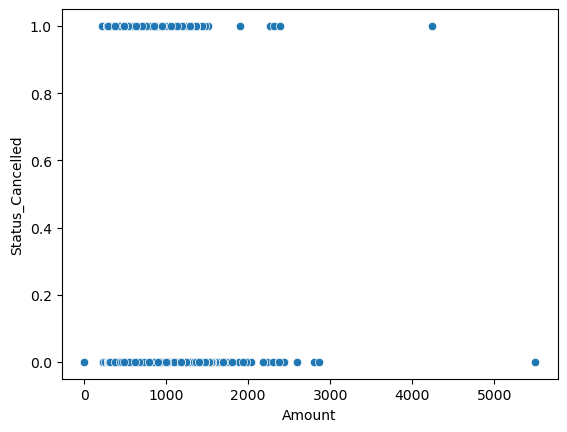

In [72]:
# Make a pairplot  from date1
# _ = sns.scatterplot(x='Amount', y='Status_Cancelled', data=df)
_ = sns.scatterplot(x='Amount', y='Status_Cancelled', data=date1)

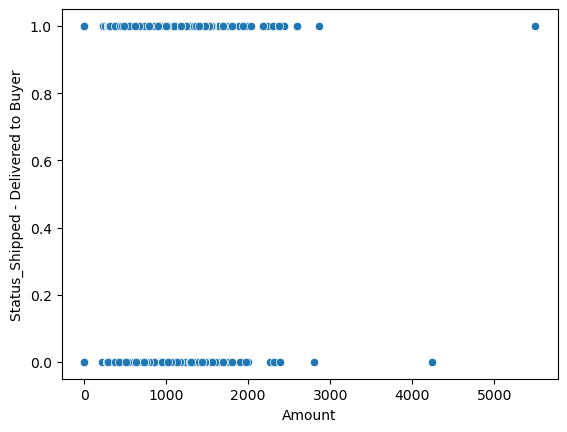

In [73]:
# Make a pairplot from date1
# _ = sns.scatterplot(x='Amount', y='Status_Shipped -Delivered to Buyer', data=df)
_ = sns.scatterplot(x='Amount', y='Status_Shipped - Delivered to Buyer', data=date1)

<Axes: >

<Figure size 2000x2000 with 0 Axes>

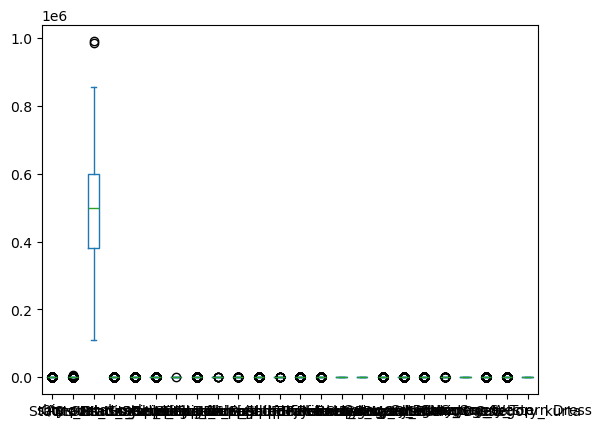

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize =(20, 20))
 
# Creating plot for the dataset date1
date1.plot(kind='box')

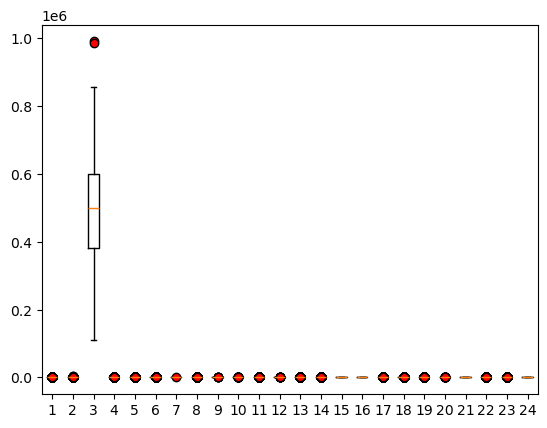

In [95]:
# changing the outlier marker
red_circle= dict(markerfacecolor='red', marker='o')
plt.boxplot(x=date1, flierprops=red_circle);

In [ ]:
# The boxplot show a lot of outliers that needs to be removed before performing the analysis.

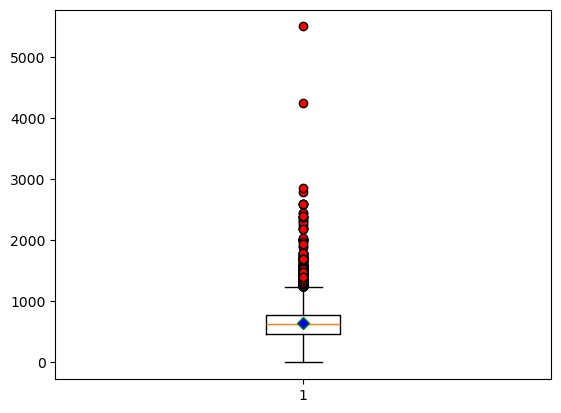

In [76]:
# Showing the mean of the depedent variable " Amount".
red_circle= dict(markerfacecolor='red', marker='o')
mean_shape= dict(markerfacecolor='blue', marker='D', markeredgecolor='green')

plt.boxplot(x=date1['Amount'], flierprops=red_circle,
           showmeans=True, meanprops=mean_shape);

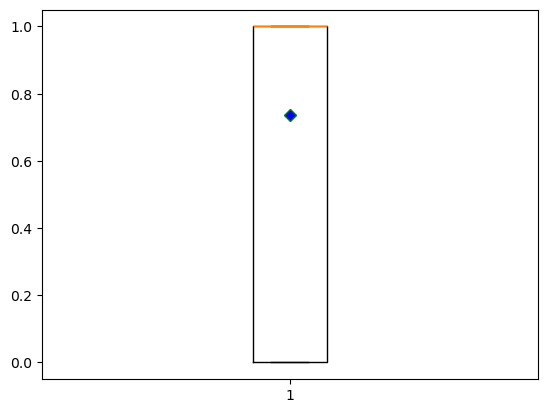

In [80]:
# Showing the mean of the depedent variable " Fulfilment".
red_circle= dict(markerfacecolor='red', marker='o')
mean_shape= dict(markerfacecolor='blue', marker='D', markeredgecolor='green')

plt.boxplot(x=date1['FulfilmentB_Amazon'], flierprops=red_circle,
           showmeans=True, meanprops=mean_shape);

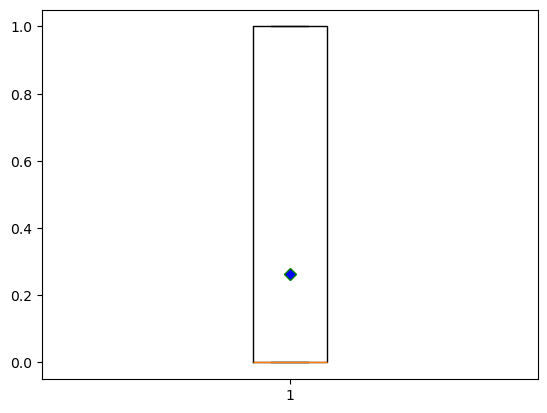

In [81]:
# Showing the mean of the depedent variable " Fulfilment".
red_circle= dict(markerfacecolor='red', marker='o')
mean_shape= dict(markerfacecolor='blue', marker='D', markeredgecolor='green')

plt.boxplot(x=date1['FulfilmentB_Merchant'], flierprops=red_circle,
           showmeans=True, meanprops=mean_shape);

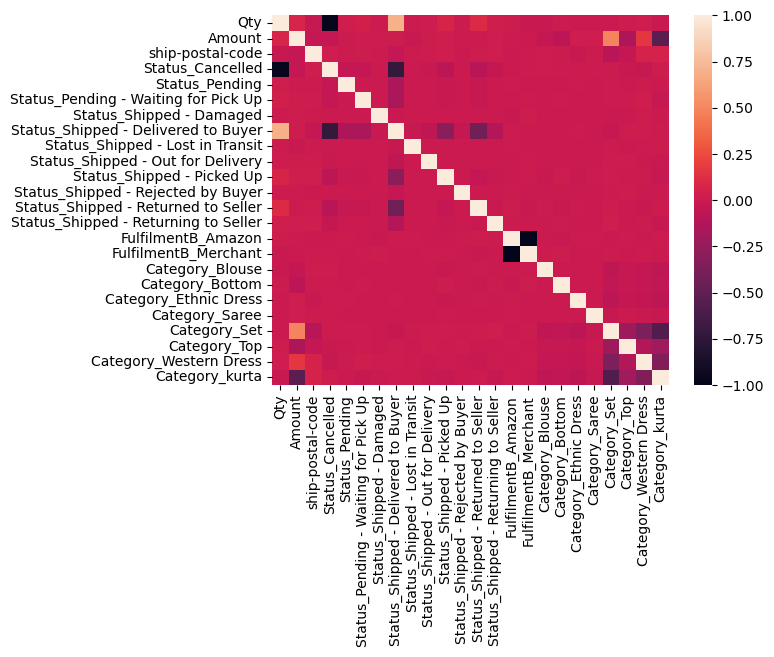

In [96]:
# Make a heatmap of the data 
# correlation_matrix = df.corr()
# _ = sns.heatmap(correlation_matrix)

# Make a heatmap of the data 
correlation_matrix = date1.corr()
_ = sns.heatmap(correlation_matrix)

In [ ]:
The heatmap show a strong correlation between the ship-postal-code and Amount. Let's make some plot between Qty and Amount.


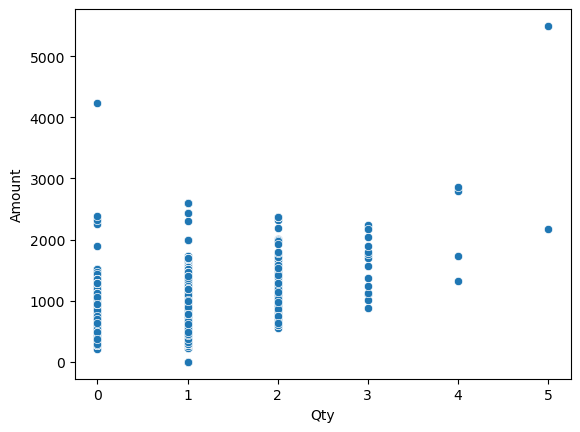

In [97]:
# Plot Qty against Amount
_ = sns.scatterplot(x='Qty', y='Amount', data=date1)

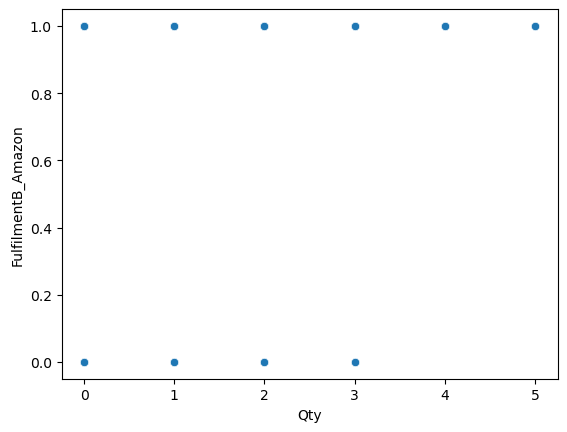

In [98]:
# Plot Qty against FulfilmentB_Amazon and FulfilmentB_Merchant
_ = sns.scatterplot(x='Qty', y='FulfilmentB_Amazon', data=date1)

In [ ]:
The data has been explored, it's time now to conduct model testing. To do that, we need first to remove the outlier.

Next step will be " Modeling".